# Exploratory Analysis Code Practice

I. Load data

In [5]:
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
RA = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/RA.pickle').reset_index(drop=True)#Race details
SE = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/SE.pickle').reset_index(drop=True)#Horse race information
UM_all = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/UM_all.pickle').reset_index(drop=True)#thông tin con ngựa
WE = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/WE.pickle').reset_index(drop=True)#weather
BN = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/BN.pickle').reset_index(drop=True)#BANUSI, người sở hữu
BR = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/BR.pickle').reset_index(drop=True)#BREEDER, nơi huấn luyện
CH = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/CH.pickle').reset_index(drop=True)#CHOKYO, trainer
HN_all = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/HN_all.pickle').reset_index(drop=True)#HANSYOKU, giống ngựa
KS = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/DSP305x/KS.pickle').reset_index(drop=True)#KISYU, người cưỡi ngựa

**II. Descriptive Statistics.**

In [3]:
#RA: tất cả thông tin các cuộc đua
RA[['Kyori', 'id$Kaiji', 'RaceInfo$Nkai', 'SyussoTosu']].describe()

,Kyori,id$Kaiji,RaceInfo$Nkai,SyussoTosu
count,35925.000000,35925.000000,35925.000000,35925.000000
mean,1663.611830,2.589395,1.686263,14.424134
std,441.106493,1.351800,9.894442,2.475481
min,1000.000000,1.000000,0.000000,4.000000
25%,1300.000000,1.000000,0.000000,13.000000
50%,1700.000000,2.000000,0.000000,15.000000
75%,1800.000000,4.000000,0.000000,16.000000
max,4260.000000,6.000000,157.000000,18.000000


In [4]:
#SE: thông tin các con ngựa trong các cuộc đua
SE[['Barei','BaTaijyu', 'Futan', 'Odds', 'Honsyokin', 'Fukasyokin', 'KakuteiJyuni']].describe()

,Barei,Futan,Odds,Honsyokin,Fukasyokin,KakuteiJyuni
count,525663.000000,525663.000000,525663.000000,5.256630e+05,525663.000000,525663.000000
mean,3.660737,550.750747,663.717315,1.353526e+04,161.926881,7.822575
std,1.344923,17.678832,949.133575,4.518528e+04,3479.832962,4.496776
min,2.000000,470.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,3.000000,540.000000,86.000000,0.000000e+00,0.000000,4.000000
50%,3.000000,550.000000,254.000000,0.000000e+00,0.000000,8.000000
75%,4.000000,560.000000,827.000000,1.100000e+04,0.000000,11.000000
max,13.000000,650.000000,9999.000000,3.000000e+06,422520.000000,18.000000


**III. Univariate Analysis**

Thông tin về bảng RA:
- TenkoCD( code weather).
- SyubetuCD( race này dành cho ngựa bao nhiêu tuổi).
- JyuryoCD( cách tính weight ngựa trong race).
- KigoCD( race code, race toàn ngựa đực, cái hay thiến)
- Kyori( khoảng cách cuộc đua).
- TrackCD( code loại sân).
- SibaBabaCD( tình trạng sân cỏ).
- DirtBabaCD( tình trạng sân đất).
- GradeCD( loại cuộc đua là đua đường phẳng, đường đất hay giải thưởng nặng không tính điểm..).

[Text(0.5, 0, 'DirtBabaCD')]

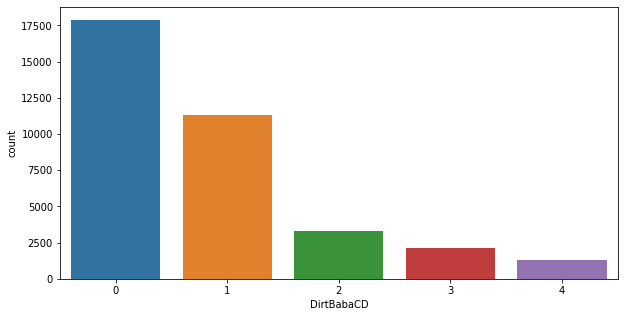

In [13]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='TenkoBaba$DirtBabaCD',data=RA)
ax.set(xlabel="DirtBabaCD")

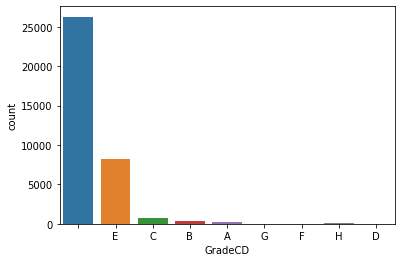

In [15]:
sns.countplot(x='GradeCD',data=RA)

[Text(0.5, 0, 'JyuryoCD')]

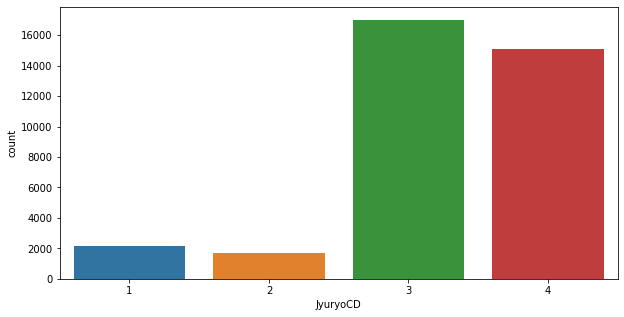

In [23]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='JyokenInfo$JyuryoCD',data=RA)
ax.set(xlabel="JyuryoCD")

[Text(0.5, 0, 'KigoCD')]

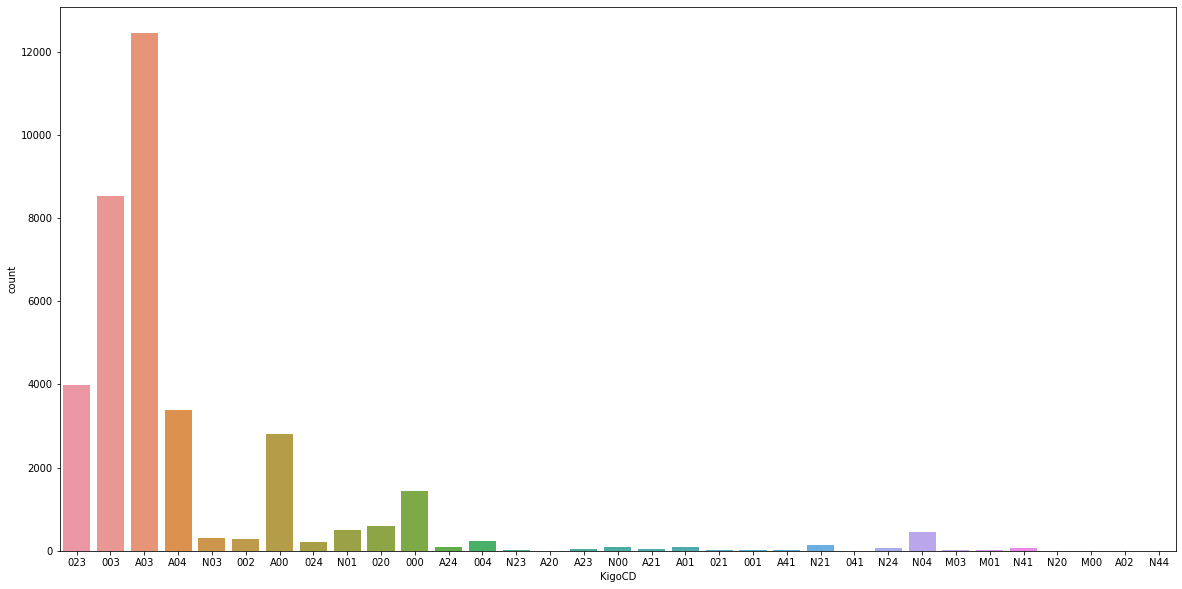

In [18]:
figure,ax=plt.subplots(figsize=(20,10))
sns.countplot(x='JyokenInfo$KigoCD',data=RA)
ax.set(xlabel="KigoCD")

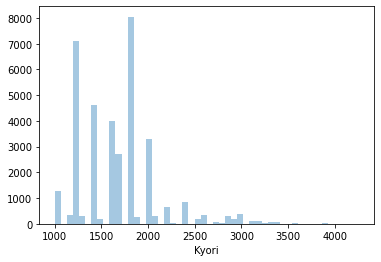

In [19]:
sns.distplot(RA['Kyori'], axlabel='Kyori',kde=False)#for quantitative columns

[Text(0.5, 0, 'SibaBabaCD')]

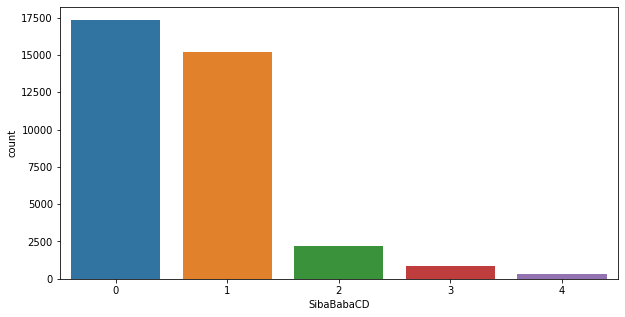

In [24]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='TenkoBaba$SibaBabaCD',data=RA)
ax.set(xlabel="SibaBabaCD")

[Text(0.5, 0, 'SyubetuCD')]

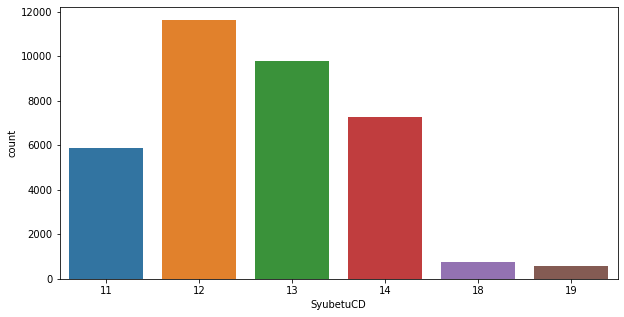

In [25]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='JyokenInfo$SyubetuCD',data=RA)
ax.set(xlabel="SyubetuCD")

[Text(0.5, 0, 'TenkoCD')]

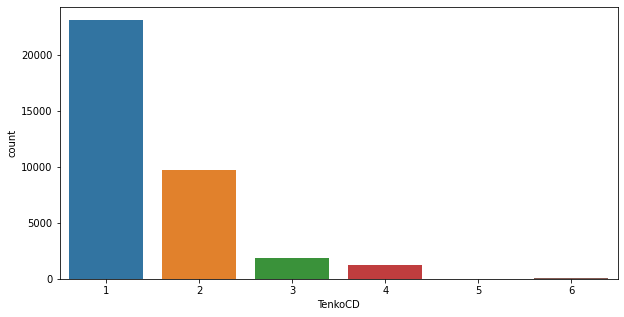

In [27]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='TenkoBaba$TenkoCD',data=RA)
ax.set(xlabel="TenkoCD")

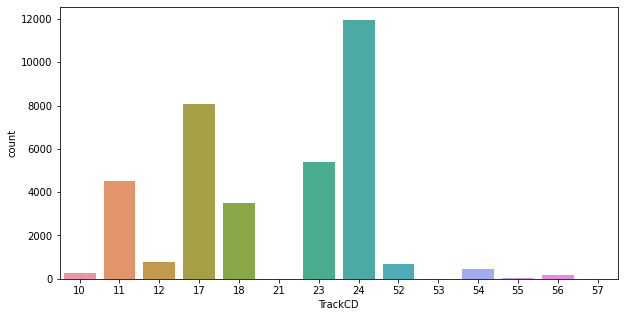

In [28]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='TrackCD',data=RA)
# ax.set(xlabel="TenkoCD")

Thông tin về bảng SE:
- SexCD( giới tính ngựa).
- Barei( tuổi ngựa).
- Futan( khổi lượng đảm nhiệm đai + người cưỡi).
- BaTaijyu( khối lượng ngựa).
- Blinker( nịt che mắt của ngựa).
- Odds( tỷ lệ cược cho ngựa thắng cuộc).
- Ninki( trình tự yêu thích do khán giả bầu).
- UmaKigoCD( code loại ngựa).
- Honsyokin( tiền thưởng thu được của race).

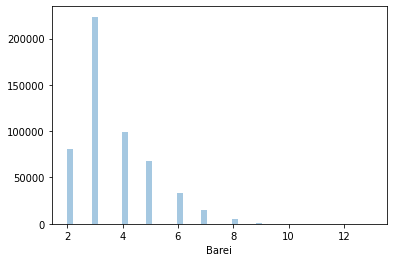

In [38]:
sns.distplot(SE['Barei'], axlabel='Barei',kde=False)#for quantitative columns

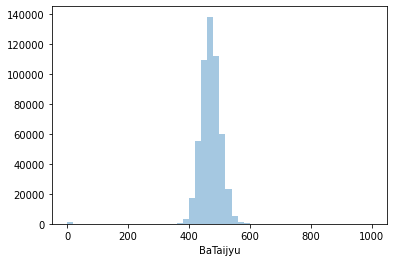

In [39]:
sns.distplot(SE['BaTaijyu'], axlabel='BaTaijyu',kde=False)#for quantitative columns

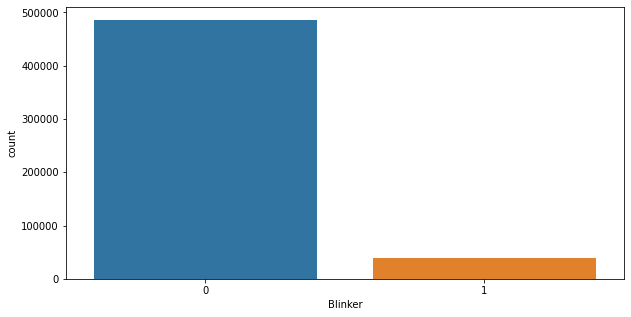

In [41]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='Blinker',data=SE)
# ax.set(xlabel="Blinker")

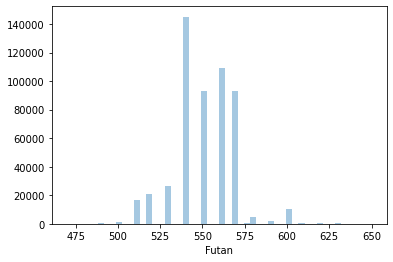

In [42]:
sns.distplot(SE['Futan'], axlabel='Futan',kde=False)#for quantitative columns

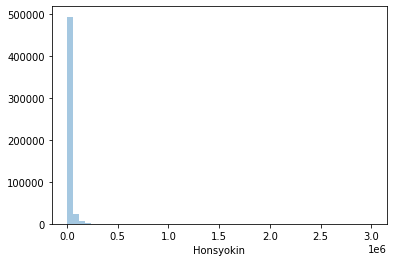

In [43]:
sns.distplot(SE['Honsyokin'], axlabel='Honsyokin',kde=False)#for quantitative columns

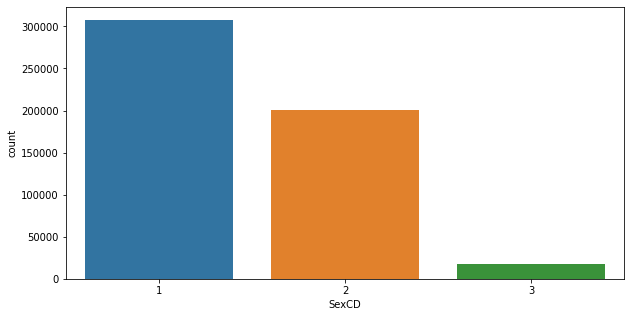

In [44]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='SexCD',data=SE)
# ax.set(xlabel="SexCD")

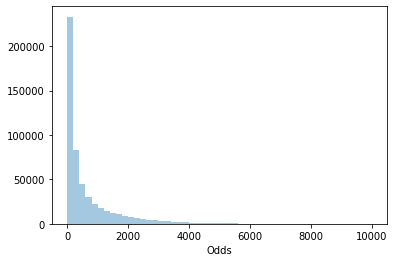

In [45]:
sns.distplot(SE['Odds'], axlabel='Odds',kde=False)#for quantitative columns
#tỷ lệ cược có thể lên tới 4000, 1:4000

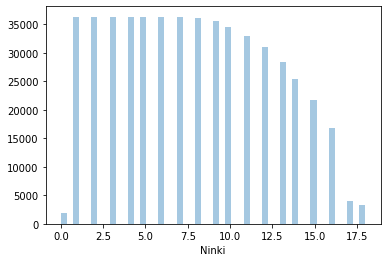

In [46]:
sns.distplot(SE['Ninki'], axlabel='Ninki',kde=False)#for quantitative columns

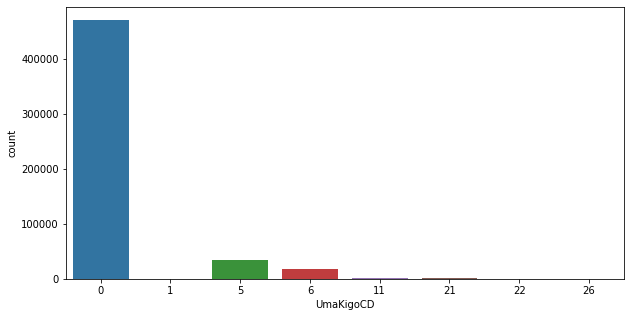

In [49]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='UmaKigoCD',data=SE)
# ax.set(xlabel="UmaKigoCD")
#Không có gì đặc biệt

Thông tin về bảng CH( Chokyo - trainer):
- SexCD( giới tính trainer).
- TozaiCD( code xuất thân của trainer).

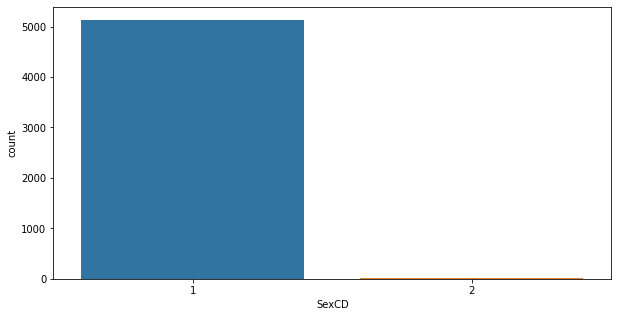

In [30]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='SexCD',data=CH)
# ax.set(xlabel="TenkoCD")

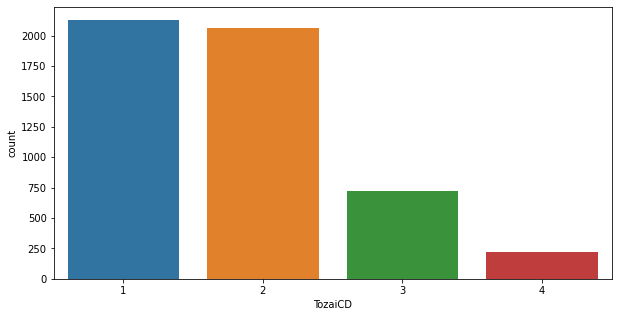

In [31]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='TozaiCD',data=CH)
# ax.set(xlabel="TozaiCD")

Thông tin về bảng KS( Kisyu - đấu sĩ):
- SikakuCD( khả năng chạy đường đất, phẳng, chướng ngại vật).
- TozaiCD( code xuất thân).
- MinaraiCD( thành tích).

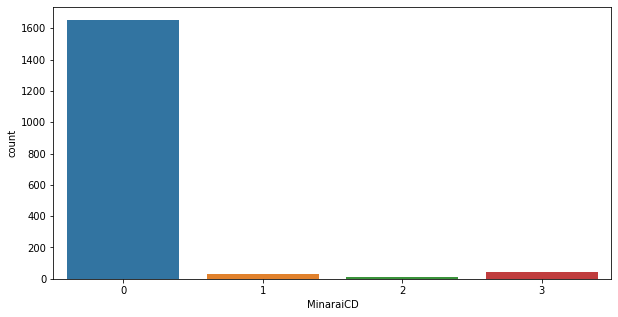

In [34]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='MinaraiCD',data=KS)
# ax.set(xlabel="MinaraiCD")

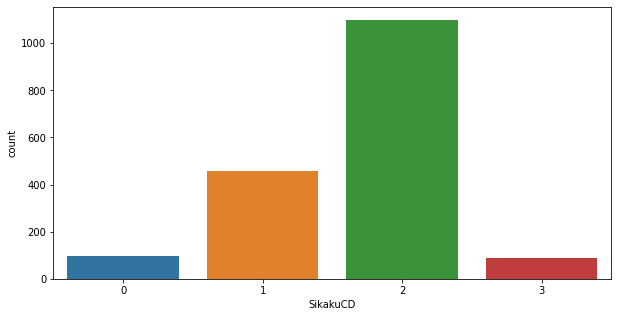

In [35]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='SikakuCD',data=KS)
# ax.set(xlabel="SikakuCD")

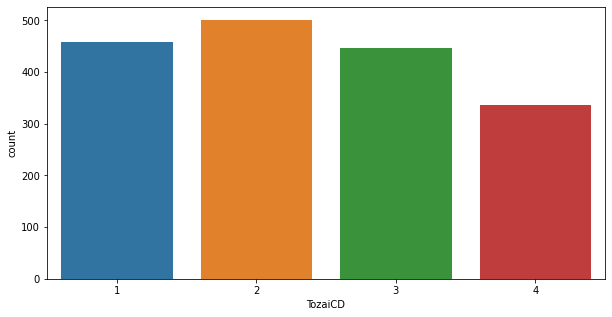

In [36]:
figure,ax=plt.subplots(figsize=(10,5))#for categorical columns
sns.countplot(x='TozaiCD',data=KS)
# ax.set(xlabel="TozaiCD")

**IV. Bivariate Analysis**

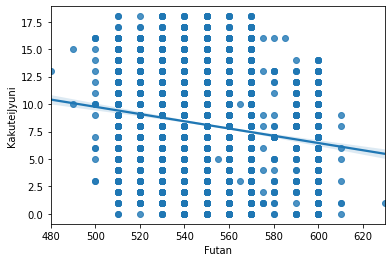

In [54]:
#Bivariate analysis: Barei, BaTaijyu, Odds.
sns.regplot(x="Futan", y="KakuteiJyuni", data=SE[1000:10000])#quantitive
# sns.catplot(x="KeiroCD", y="KakuteiJyuni",kind="strip",data=data)#categorical

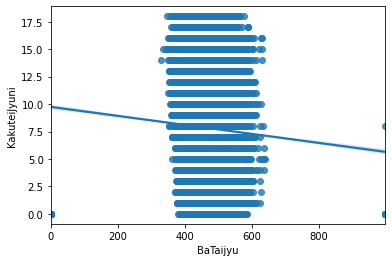

In [75]:
SE['BaTaijyu'] = pd.to_numeric(SE['BaTaijyu'])
sns.regplot(x="BaTaijyu", y="KakuteiJyuni", data=SE)#quantitive

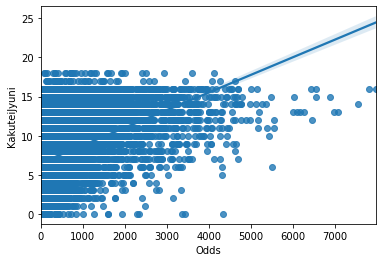

In [59]:
sns.regplot(x="Odds", y="KakuteiJyuni", data=SE[1000:10000])#quantitive